# Working at DETE and TEFE: an overlook of employee satisfaction

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction?  
- What about employees who have been there longer?  
- Are younger employees resigning due to some kind of dissatisfaction?
- What about older employees?

Due to the fact templates were customized, we'll need to go through an extensive exercise of data cleaning.  
The main items we need to pick up are **Years of work**, **Dissatisfaction**. 

*DETE = Department of Education, Training and Employment  
TAFE = Technical and Further Education institute in Queensland, Australia.*

A data dictionary wasn't provided with the dataset.For this project, we'll use our general knowledge to define the columns.

Below is a preview of a couple columns we'll work with from the dete_survey.csv:
- ```ID```: An id used to identify the participant of the survey
- ```SeparationType```: The reason why the person's employment ended  
- ```Cease Date```: The year or month the person's employment ended  
- ```DETE Start Date```: The year the person began employment with the DETE  

Below is a preview of a couple columns we'll work with from the tafe_survey.csv:
- ```Record ID```: An id used to identify the participant of the survey  
- ```Reason for ceasing employment```: The reason why the person's employment ended  
- ```LengthofServiceOverall```: Overall Length of Service at Institute (in years).

In [202]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

dete = pd.read_csv('dete-exit-survey.csv')
tafe = pd.read_csv('tafe_survey.csv')

#Quick exploration of the data
pd.options.display.max_columns = 150 # to avoid truncated output 
dete.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [203]:
tafe.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction?  
- What about employees who have been there longer?  
- Are younger employees resigning due to some kind of dissatisfaction?
- What about older employees?

In [6]:
dete.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Professional Development',
       'Opportunities for promotion', 'Staff morale', 'Workplace issue',
       'Physical environment', 'Worklife balance',
       'Stress and pressure support', 'Performance of supervisor',
       'Peer support', 'Initiative', 'Skills', 'Coach', 'Career Aspirations',
       'Feedback', 'Further PD', 'Communication', 'My say', 'Inform

In [7]:
tafe.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate oppo

Initial findings:  
- Tafe has 72 columns, majority of which are shared with Dete (56 columns)  
- Tafe has more variety in dataset integrity.  
- Both datasets handle NaN values in a different way (Either '-' or 'Not Stated') 
- There are plenty of columnns we can erase.

## 1. Identify Missing Values and Drop Unneccessary Columns


In [9]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

Use the DataFrame.drop() method to drop the following columns from dete_survey: dete_survey.columns[28:49]. Remember to set the axis parameter equal to 1.
Assign the result to dete_survey_updated.
Use the DataFrame.drop() method to drop the following columns from tafe_survey: tafe_survey.columns[17:66]. Remember to set the axis parameter equal to 1.
Assign the result to tafe_survey_updated.


In [205]:
#drop cols
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)
tafe_survey_updated = tafe.drop(tafe.columns[17:66], axis = 1)

#check new datasets
print(dete_survey_updated.columns)
print(dete_survey_updated.shape)
print('\n')
print(tafe_survey_updated.columns)
print(tafe_survey_updated.shape)


Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')
(822, 35)


Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contr

In [12]:
dete_survey_updated.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [13]:
tafe_survey_updated.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


## 2. Rename columns and harmonize datasets
The end-goal objective is to have datasets mergeable, so having common names for columns will make our lives easier. Hence we are going to:  
- set all columns lowercase and snake_case
- set up a mapping dictionary {dete:tafe}
- rename columns according to dictionary

In [14]:
dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [15]:
#set all columns to lowercase and change spaces with snake_case
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.replace(" ","_")
print(dete_survey_updated.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


Doing the same thing for Tafe would be impossible, HENCE we will map it to a dictionary

In [206]:
mapping = {'Record ID':'id', 'CESSATION YEAR': 'cease_date',
           'Reason for ceasing employment': 'separationtype',
           'Gender. What is your Gender?': 'gender',
           'CurrentAge. Current Age': 'age',
           'Employment Type. Employment Type': 'employment_status',
           'Classification. Classification': 'position',
           'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
           'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

tafe_survey_updated = tafe_survey_updated.rename(mapping, axis = 1)

#check that all results are ok
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


This way we have harmonized the two datasets, using the same column names. As a next step, we will merge them together. The next obvious step to go through is consider carefully the reasons for which employees have resigned.

In [18]:
tafe_survey_updated['separationtype'].value_counts(dropna=False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64

In [19]:
tafe_survey_updated[tafe_survey_updated['separationtype'].isnull() == True]

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
324,6.345804e+17,Sunshine Coast Institute of TAFE,Non-Delivery (corporate),2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
tafe_survey_updated.drop(index=324, inplace=True)

In [21]:
#we have removed a single row that was null all across the board
tafe_survey_updated.shape

(701, 23)

In [22]:
dete_survey_updated['separationtype'].value_counts(dropna=False)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

# 3. Verify the Data
We have run a preliminary check and, identified our key data (the 'separationtype' column) and cleaned it up a bit (we have removed a fully NaN row) we are in the condition of analyzing our other main input: Age and years of service.

Below, we clean and explore the ```cease_date``` and ```dete_start_date``` columns to make sure all of the years make sense. We'll use the following criteria:
Since the ```cease_date``` is the last year of the person's employment and the ```dete_start_date``` is the person's first year of employment, it wouldn't make sense to have years after the current date.  
Given that most people in this field start working in their 20s, it's also unlikely that the ```dete_start_date``` was before the year 1940.


In [23]:
dete_survey_updated['cease_date'].value_counts(dropna=False)

2012       344
2013       200
01/2014     43
12/2013     40
09/2013     34
NaN         34
06/2013     27
07/2013     22
10/2013     20
11/2013     16
08/2013     12
05/2013      7
05/2012      6
07/2014      2
04/2013      2
08/2012      2
02/2014      2
04/2014      2
2010         1
11/2012      1
2014         1
09/2010      1
07/2006      1
09/2014      1
07/2012      1
Name: cease_date, dtype: int64

In [24]:
#overwrite 'cease_date' column with a cleaned version of itself
dete_survey_updated['cease_date'] = dete_survey_updated['cease_date'].str.split('/').str[-1]
dete_survey_updated['cease_date'].value_counts(dropna=False)

2013    380
2012    354
2014     51
NaN      34
2010      2
2006      1
Name: cease_date, dtype: int64

In [25]:
dete_survey_updated['cease_date'] = dete_survey_updated['cease_date'].astype(float)
tafe_survey_updated['cease_date'] = tafe_survey_updated['cease_date'].astype(float)

In [26]:
tafe_survey_updated['cease_date'].value_counts(dropna=False)

2011.0    267
2012.0    235
2010.0    103
2013.0     85
NaN         7
2009.0      4
Name: cease_date, dtype: int64

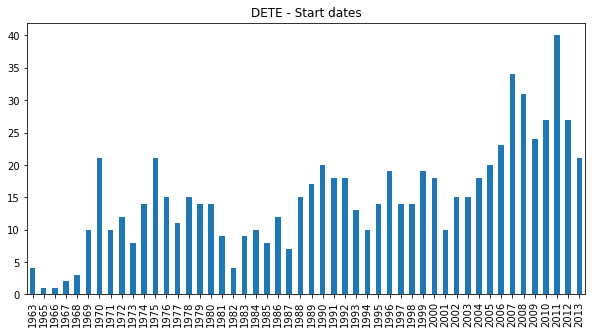

In [27]:
temp = dete_survey_updated['dete_start_date'].value_counts().sort_index()
#convert index to string
temp.index = temp.index.map(int).map(str)
#plot everything
temp.plot(kind='bar', figsize=(10,5), title='DETE - Start dates')

### Analyzing distributions of Years - do we have outliers?

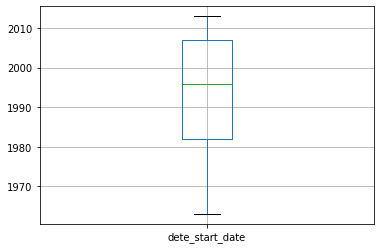

In [28]:
dete_survey_updated.boxplot(column = 'dete_start_date')

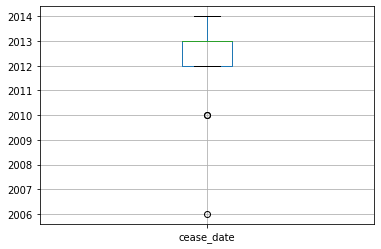

In [29]:
dete_survey_updated.boxplot(column = 'cease_date')

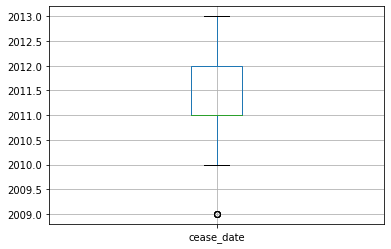

In [30]:
#Switching to TAFE dataset
tafe_survey_updated.boxplot(column = 'cease_date')

Overall, it looks like hal of DETE employees started in 1982 till 2008, with an incredible rate of churn in 2012-2013. We have a couple of outliers in 2010 and 2006.
The situation of TAFE is much more even wish a single outlier in 2009.

# Aligning dataframes
We are in need of getting same kind of data from both parts, specifically we are mapped in a similar way:

In [31]:
d = {'dete_survey': ["id", "separationtype", "cease_date", "dete_start_date","","age","gender"], 
     'tafe_survey': ["id", "separationtype", "cease_date", "", "institute_service", "age", "gender"]}
df = pd.DataFrame(data=d)
df

,dete_survey,tafe_survey
0,id,id
1,separationtype,separationtype
2,cease_date,cease_date
3,dete_start_date,
4,,institute_service
5,age,age
6,gender,gender


As a consequence, we are in need of pairing these two missing columns.
- **institute_service** is intended as the years of service, hence can be calculated as *(cease_date - start_date)*
- **start_date** is intended as *(end_date - institute_service)*

In [32]:
dete_survey_updated["institute_service"] = dete_survey_updated['cease_date'] - dete_survey_updated['dete_start_date']
dete_survey_updated["institute_service"].head()

0    28.0
1     NaN
2     1.0
3     7.0
4    42.0
Name: institute_service, dtype: float64

In [33]:
df['dete_survey'][4] = 'institute_service'
df

,dete_survey,tafe_survey
0,id,id
1,separationtype,separationtype
2,cease_date,cease_date
3,dete_start_date,
4,institute_service,institute_service
5,age,age
6,gender,gender


At this point we find ourselves with matching columns at least for the institute_service. The fact we are lacking the start_date for TAFE is not a big deal since we'll need to compare institute_service of the two groups against the satisfaction rates of the involved parties.  

A further challenge will be to align the groups on timeframes, as suggested by **tafe_survet_updated\['institute_service'\]**

In [34]:
tafe_survey_updated['institute_service'].value_counts(dropna=False)

Less than 1 year      147
NaN                   105
1-2                   102
3-4                    96
11-20                  89
More than 20 years     71
5-6                    48
7-10                   43
Name: institute_service, dtype: int64

# Identify Dissatisfied Employees


In [35]:
#shortening dataframe names
tafe = tafe_survey_updated
dete = dete_survey_updated

In [36]:
tafe.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [37]:
dete.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'institute_service'],
      dtype='object')

### Column choice for TAFE
The dataset reports entries of customers that for some reason have left their job. Not all of these reasons are related to dissatisfaction (e.g. Career moves). We will hence consider the following columns:
- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissatisfaction
- Contributing Factors. Interpersonal Conflict

### Columns choice for DETE
- interpersonal_conflicts
- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload

If any of the chosen flags are True, we'll mark the employee (row) as dissatisfied. This will be achieved through the [`dataframe.any()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.any.html#pandas.DataFrame.any) method.

In [38]:
#defining subset of relevant columns for each dataframe
tafe_subset = tafe.iloc[:,10:13]
dete_subset = dete.iloc[:,[12,13,14,15,16,17,18,19,-10,-11]]

In [39]:
#check if we have different values in TAFE
pd.Series(list(map(set,tafe_subset.values.T)),index=tafe_subset.columns)

Contributing Factors. Dissatisfaction           {nan, Contributing Factors. Dissatisfaction , -}
Contributing Factors. Job Dissatisfaction                          {nan, Job Dissatisfaction, -}
Contributing Factors. Interpersonal Conflict                    {nan, Interpersonal Conflict, -}
dtype: object

In [40]:
#check if we have different values in DETE as well
pd.Series(list(map(set,dete_subset.values.T)),index=dete_subset.columns)

interpersonal_conflicts                {False, True}
job_dissatisfaction                    {False, True}
dissatisfaction_with_the_department    {False, True}
physical_work_environment              {False, True}
lack_of_recognition                    {False, True}
lack_of_job_security                   {False, True}
work_location                          {False, True}
employment_conditions                  {False, True}
workload                               {False, True}
work_life_balance                      {False, True}
dtype: object

While the dete_subset dataframe is solid enough and with non-null values, **the TAFE dataset is indeed compromised**. We need to clean it up and have it return either NaN, True or False values. For this reason we will define a function.

In [41]:
#define a mapping function for a SINGLE value. This will be applied multiple times by the methods.
def update_vals(x):
    if x == '-':
        return False
    elif pd.isnull(x): #within a named function, if you use a pandas method you need to specify the library it is coming from
        return np.nan #same here to define NaNs
    elif x == False:
        return False
    else:
        return True   

In [42]:
#Apply mapping function to chosen columns and change values in main dataframe Tafe
tafe[tafe_subset.columns] = tafe[['Contributing Factors. Dissatisfaction',
                                  'Contributing Factors. Job Dissatisfaction',
                                  'Contributing Factors. Interpersonal Conflict']].applymap(update_vals)

#check values distribution in the columns
for col in tafe[tafe_subset.columns]: #for loop reduces the operation to single series
    print(tafe[col].value_counts(dropna=False))

False    371
NaN      264
True      66
Name: Contributing Factors. Dissatisfaction, dtype: int64
False    360
NaN      264
True      77
Name: Contributing Factors. Job Dissatisfaction, dtype: int64
False    410
NaN      264
True      27
Name: Contributing Factors. Interpersonal Conflict, dtype: int64


In [43]:
#TAFE DF -> add a 'dissatisfied' column as True if any value in the other two is True
tafe['dissatisfied'] = tafe[tafe_subset.columns].any(axis=1, skipna=False)

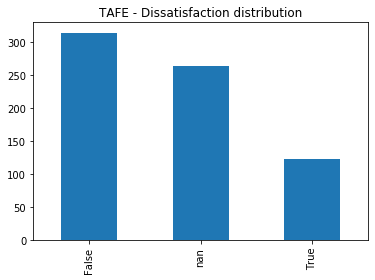

In [44]:
tafe['dissatisfied'].value_counts(dropna=False).plot(kind='bar', title= 'TAFE - Dissatisfaction distribution')

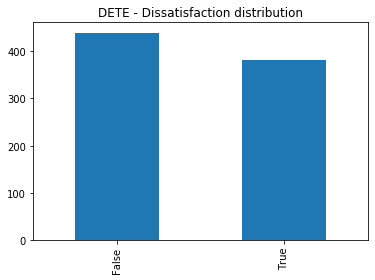

In [45]:
#DETE DF -> add a 'dissatisfied' column as True if any value in the other is True
dete['dissatisfied'] = dete_subset.any(axis=1, skipna=False)
dete['dissatisfied'].value_counts().plot(kind='bar', title='DETE - Dissatisfaction distribution')

# Aggregate Dataframes
As mentioned, we want to be able to put the two dataframes together. In order to do so and not lose visibility of data belonging, we will add a "institute" column to both DF.

In [46]:
dete["institute"] = 'DETE'
tafe["institute"] = 'TAFE'

Now we are ready to aggregate the dataframes with the `concat() ` function.  
Obviously, since some columns are not available, we will find an exponential grow of null values in the combined dataframe.

In [47]:
print('total null values in DETE ' + str(dete.isnull().sum().sum()))
print('total null values in TAFE ' + str(tafe.isnull().sum().sum()))

total null values in DETE 5550
total null values in TAFE 4069


In [48]:
#combine dataframes
combined = pd.concat([dete, tafe], axis = 0, ignore_index = True)

#retrieve total null values
print('total null values in combined ' + str(combined.isnull().sum().sum()))

total null values in combined 41577


c:\users\niccolo.longoni\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


We will keep all columns that have AT LEAST 500 non-null values.  
**In other words, we will DROP all columns with less than 500 non-null values.** Basically, till "classification" backwards.

In [49]:
combined.notnull().sum().sort_values()

torres_strait                                             3
south_sea                                                 7
aboriginal                                               16
disability                                               23
nesb                                                     32
business_unit                                           126
Contributing Factors. Travel                            437
Contributing Factors. Study                             437
Contributing Factors. Other                             437
Contributing Factors. Career Move - Private Sector      437
Contributing Factors. Maternity/Family                  437
Contributing Factors. Job Dissatisfaction               437
Contributing Factors. Interpersonal Conflict            437
Contributing Factors. Career Move - Public Sector       437
Contributing Factors. Ill Health                        437
Contributing Factors. NONE                              437
Contributing Factors. Dissatisfaction   

In [50]:
combined_updated = combined.dropna(axis = 1, thresh=500)

In [51]:
combined_updated.notnull().sum().sort_values()

role_service                            596
Institute                               701
WorkArea                                701
region                                  717
role_start_date                         724
dete_start_date                         749
work_life_balance                       822
traumatic_incident                      822
study/travel                            822
relocation                              822
physical_work_environment               822
none_of_the_above                       822
maternity/family                        822
lack_of_recognition                     822
lack_of_job_security                    822
job_dissatisfaction                     822
interpersonal_conflicts                 822
workload                                822
career_move_to_private_sector           822
ill_health                              822
career_move_to_public_sector            822
dissatisfaction_with_the_department     822
work_location                   

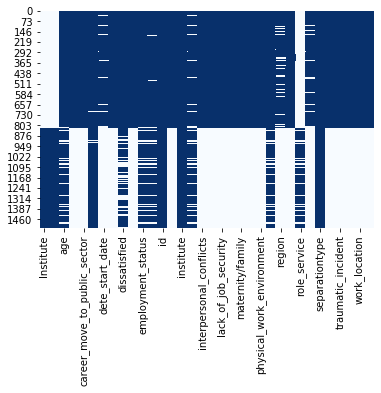

In [52]:
#white areas define null values. The conjunction line of the two dataframes is pretty clear...
import seaborn as sns
sns.heatmap(combined_updated.isnull(), cmap="Blues_r", cbar=False)

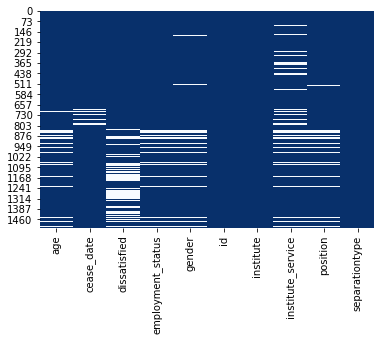

In [53]:
#this would put us in a much more solid and rigorous condition
rigid = combined_updated.dropna(axis = 1, thresh=1000)
sns.heatmap(rigid.isnull(), cmap="Blues_r", cbar=False)

# Cleaning the 'institute_service' Column

We need to convert the high variability of this column (that is containing strings, float and integers) into categories
We'll use the slightly modified definitions below:

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company


In [54]:
combined_updated['institute_service'].value_counts().index

Index([  'Less than 1 year',                '1-2',                '3-4',
                    '11-20', 'More than 20 years',                '5-6',
                     '7-10',                  1.0,                  5.0,
                        3.0,                  0.0,                  4.0,
                        6.0,                  2.0,                 22.0,
                       37.0,                  9.0,                 15.0,
                       13.0,                 23.0,                 43.0,
                        7.0,                 17.0,                 24.0,
                       38.0,                 16.0,                 21.0,
                       14.0,                  8.0,                 35.0,
                       39.0,                 12.0,                 11.0,
                       10.0,                 19.0,                 42.0,
                       32.0,                 20.0,                 34.0,
                       26.0,                 33.0, 

There is a lot of variability here, so we'll need to set a string regex that will identify numbers into these strings. The best option is using `r'(\d+)' ` - see [regex documentation](https://docs.python.org/3.4/library/re.html)  

"Matches any Unicode decimal digit (that is, any character in Unicode character category [Nd]). This includes [0-9], and also many other digit characters. If the ASCII flag is used only [0-9] is matched (but the flag affects the entire regular expression, so in such cases using an explicit [0-9] may be a better choice)."

SO basically:
- with  `\d ` we select all digits characters [0-9]
- with  `+ ` we select all the iterations of digit characters
- with `()` we create only a single group of consecutive digit chars
- with  `str.extract ` method we recover ONLY the first group

In [55]:
regexd_col = combined_updated['institute_service']
regexd_col = regexd_col.astype('str').str.extract(r'(\d+)')

In [56]:
type(regexd_col)

pandas.core.frame.DataFrame

In [57]:
regexd_col_s = regexd_col.loc[:,0].astype(float)
regexd_col_s.head() #this is the series

0    28.0
1     NaN
2     1.0
3     7.0
4    42.0
Name: 0, dtype: float64

In [58]:
 #this will return an empty df because I'm trying to match series with DF
combined_updated.loc[:,'institute_service_up'] = regexd_col

C:\Users\niccolo.longoni\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\niccolo.longoni\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


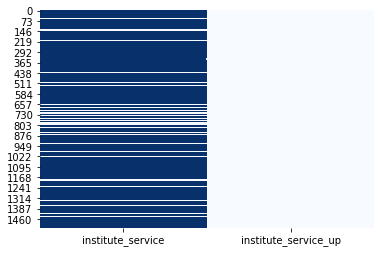

In [59]:
sns.heatmap(combined_updated[['institute_service', 'institute_service_up']].isnull(), cmap="Blues_r", cbar=False)

In [60]:
#On the other hand if I execute across series..
combined_updated.loc[:,'institute_service_up'] = regexd_col_s

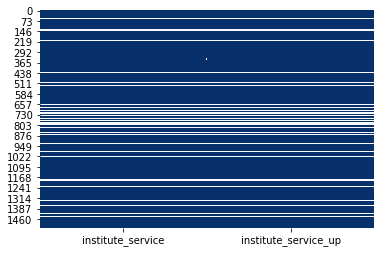

In [61]:
sns.heatmap(combined_updated[['institute_service', 'institute_service_up']].isnull(), cmap="Blues_r", cbar=False)

In [62]:
#verify result
combined_updated[['institute_service', 'institute_service_up']].tail(10)

,institute_service,institute_service_up
1513,NaN,NaN
1514,1-2,1.0
1515,NaN,NaN
1516,Less than 1 year,1.0
1517,5-6,5.0
1518,1-2,1.0
1519,NaN,NaN
1520,5-6,5.0
1521,1-2,1.0
1522,3-4,3.0


We now need to set up a mapping function that will return the chosen values.
- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In [66]:
def convert_year(x):
    if type(x) == str: #to manage any re-running of the cells
        return x
    elif x< 3:
        return "New"
    elif x>=3 and x<=6:
        return "Experienced"
    elif x>6 and x<= 10:
        return "Established"
    elif pd.isnull(x):
        return np.nan
    else:
        return "Veteran"

In [207]:
#apply function to a series
combined_updated.loc[:,'service_cat'] = combined_updated.loc[:,'institute_service_up'].map(convert_year)
combined_updated[['institute_service_up','service_cat']].head()

,institute_service_up,service_cat
0,28.0,Veteran
1,NaN,NaN
2,1.0,New
3,7.0,Established
4,42.0,Veteran


# At Last: THE ANALYSIS!
Remember the initial question: are people more or less satisfied according to their level of service?
We can remove some dust from the grouping functions, mostly from pivot_table().

In [71]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    755
True     504
NaN      264
Name: dissatisfied, dtype: int64

In [85]:
#converting the dissatisfied column to 1 and zeros.
combined_updated.loc[:,'dissatisfied_val'] = combined_updated.loc[:,'dissatisfied']

mapping = {True:1, False:0, np.nan: np.nan}
combined_updated.loc[:,'dissatisfied_val'] = combined_updated['dissatisfied_val'].map(mapping)

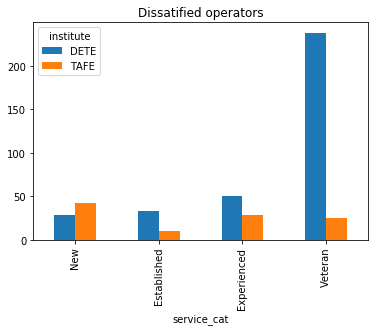

In [167]:
combined_pivot = combined_updated.pivot_table(index = 'service_cat', values='dissatisfied_val', columns='institute', aggfunc=(np.sum))

#reindex order of values and generate plot
order = ['New', 'Established', 'Experienced', 'Veteran']
combined_pivot.reindex(order).plot(kind='bar', title='Dissatified operators')

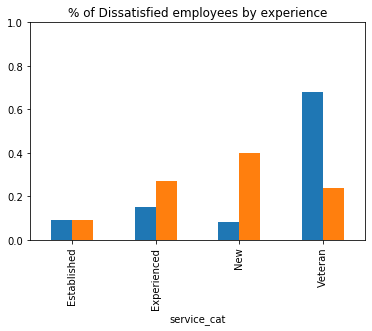

In [188]:
#Retrieve same graph as above as a should be made as a loop
combined_pivot['DETE%'] = round(combined_pivot['DETE']/combined_pivot['DETE'].sum(), 2)
combined_pivot['TAFE%'] = round(combined_pivot['TAFE']/combined_pivot['TAFE'].sum(), 2)

combined_pivot[['DETE%','TAFE%']].plot(kind='bar', 
                                       #subplots=True,
                                       legend=False,
                                       ylim= (0,1),
                                       title='% of Dissatisfied employees by experience'
                                      )

Let's work out results by Age as well, to check if we have a correlation

In [147]:
cleaned_age = combined_updated['age'].str.extract(r'(\d+)')
combined_updated.loc[:,'cleaned_age'] = cleaned_age.iloc[:,0].astype(float)

In [148]:
combined_updated['cleaned_age'].value_counts().sort_index(ascending=False)

61.0    222
56.0    336
51.0    185
46.0    122
41.0    141
36.0    102
31.0     91
26.0    107
21.0     84
20.0     17
Name: cleaned_age, dtype: int64

In [196]:
def clean_age(x):
    if type(x) == str:
        return x
    elif x < 30:
        return 'Less than 30'
    elif x < 40:
        return '31-40'
    elif x < 50:
        return '41-50'
    elif x < 60:
        return '51-60'
    elif x > 60:
        return 'Over 60'
    else:
        return x

In [197]:
combined_updated.loc[:,'age_ranges'] = combined_updated.loc[:,'cleaned_age'].apply(clean_age)
combined_updated['age_ranges'].value_counts()

51-60           521
41-50           263
Over 60         222
Less than 30    208
31-40           193
Name: age_ranges, dtype: int64

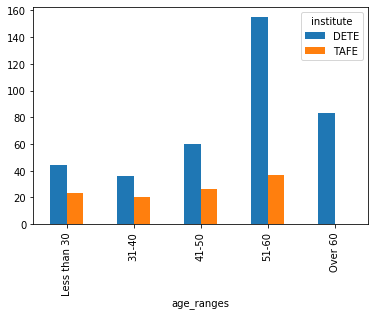

In [199]:
#reindex order of values and generate plot
col_order = ['Less than 30', '31-40', '41-50', '51-60', 'Over 60']

combined_pivot = combined_updated.pivot_table(index = 'age_ranges', values='dissatisfied_val', columns='institute', aggfunc=(np.sum))
combined_pivot.reindex(col_order).plot(kind='bar')

In [201]:
combined_pivot.apply()

institute,DETE,TAFE
age_ranges,,
31-40,36.0,20.0
41-50,60.0,26.0
51-60,155.0,37.0
Less than 30,44.0,23.0
Over 60,83.0,NaN


combined['age'].str.extract(r'(\d+)')